# Import bibliotek

In [ ]:
!pip install unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import requests
import re
from time import sleep
import html
from unidecode import unidecode
import unicodedata
from bs4 import BeautifulSoup
import random

# Zdobycie danych ze strony

In [ ]:
bike_type = ['drop-bar', 'mountain', 'fitness-transit']

def _get_website(link):
  http_adress = link
  response = requests.get(http_adress)
  content = response.content.decode('utf-8')
  content = html.unescape(content)
  content = unicodedata.normalize('NFKD', content)
  soup = BeautifulSoup(content, 'html.parser')
  return soup

link_mtb = f'https://www.marinbikes.com/pl/bikes/type/mountain'

def get_product_links(link):
  bike_links = []
  soup = _get_website(link)
  links = soup.find_all('h3', {'class' : 'bike-card__title'})
  for i in range(len(links)):
    bike_links.append(links[i].find('a', href = True)['href'])
  return bike_links

In [ ]:
# n to indeks kolumny, z której ma porbrać wartość - inna dla sportowych rowerów (4)
def get_table(link, n = 2):
  data = []
  vars_dict = {}
  soup = _get_website(link)
  table = soup.find('div', {'class' : 'geometry__table'})
  table_body = table.find('tbody')
  rows = table_body.find_all('tr')

  for row in rows:
      cols = row.find_all('td')
      cols = [ele.text.strip() for ele in cols]
      data.append([ele for ele in cols if ele])
  for var in range(13):
    name = data[var][0].replace(' ','')[2:].lower()
    try:
      value = data[var][n]
    except:
      value = None   
    vars_dict[name] = value
  return vars_dict

In [ ]:
mtb_links = get_product_links('https://www.marinbikes.com/pl/bikes/type/mountain')

In [ ]:
mtb_links

In [ ]:
import random
from time import sleep
bikes_list = []
for bike in mtb_links:
  bikes_list.append(get_table(bike))
  sleep(random.randint(1, 3))

In [ ]:
mtb_bikes = pd.DataFrame(bikes_list)

In [ ]:
mtb_bikes['type'] = 'mtb'

In [ ]:
dropbar_links = get_product_links('https://www.marinbikes.com/pl/bikes/type/drop-bar')

In [ ]:
dropbar_links

['https://www.marinbikes.com/pl/bikes/2023-headlands-2',
 'https://www.marinbikes.com/pl/bikes/2023-headlands-1',
 'https://www.marinbikes.com/pl/bikes/2023-headlands-frame-kit',
 'https://www.marinbikes.com/pl/bikes/2023-gestalt-x10',
 'https://www.marinbikes.com/pl/bikes/2023-gestalt-2-5',
 'https://www.marinbikes.com/pl/bikes/2023-gestalt-1',
 'https://www.marinbikes.com/pl/bikes/2023-gestalt',
 'https://www.marinbikes.com/pl/bikes/2023-nicasio-2',
 'https://www.marinbikes.com/pl/bikes/2023-nicasio-plus',
 'https://www.marinbikes.com/pl/bikes/2023-nicasio',
 'https://www.marinbikes.com/pl/bikes/2023-lombard-1',
 'https://www.marinbikes.com/pl/bikes/2023-four-corners',
 'https://www.marinbikes.com/pl/bikes/2022-gestalt-x11',
 'https://www.marinbikes.com/pl/bikes/2022-gestalt-2']

In [ ]:
bikes_list = []
for bike in dropbar_links:
  bikes_list.append(get_table(bike, n = 4))
  sleep(random.randint(1, 3))

dropbar_bikes = pd.DataFrame(bikes_list)

In [ ]:
dropbar_bikes['type'] = 'dropbar'

In [ ]:
dropbar_bikes

,stack,reach,headtubeangle,headtubelength,seattubeangle,seattubelength,toptubeeffective,bbheight,bbdrop,chainstay,wheelbase,standoverheight,forkoffset,seattubeangle(actual),toptube(effective),bottombracketheight,bottombracketdrop,type
0,600.8,386.4,71.5°,170,73.5°,510,565,272,76,420,1028.5,758,50,NaN,NaN,NaN,NaN,dropbar
1,600.8,386.4,71.5°,170,73.5°,510,565,272,76,420,1028.5,758,50,NaN,NaN,NaN,NaN,dropbar
2,600.8,386.4,71.5°,170,73.5°,510,565,272,76,420,1028.5,758,50,NaN,NaN,NaN,NaN,dropbar
3,621.5,460,67.5°,210,74°,530,638.2,282.5,80,425,1155.6,734.5,50,NaN,NaN,NaN,NaN,dropbar
4,593.7,389.1,72°,170,73.5°,530,565,271,72,415,1019.9,774,50,NaN,NaN,NaN,NaN,dropbar
5,601,387,71.5°,170,73.5°,520,565,276,78,432,1040,775,50,NaN,NaN,NaN,NaN,dropbar
6,601,387,71.5°,170,73.5°,520,565,276,78,432,1040,775,50,NaN,NaN,NaN,NaN,dropbar
7,591.5,384.2,71.5°,170,74°,530,565,269,72,420,1024.5,777.05,50,NaN,NaN,NaN,NaN,dropbar
8,574.52,378.42,72°,155,73.5°,510,545,269,72,420,999.2,758.79,45,NaN,NaN,NaN,NaN,dropbar
9,574.52,378.42,72°,155,NaN,510,NaN,NaN,NaN,420,999.2,758.79,45,73.5°,545,269,72,dropbar


In [ ]:
fitness_links = get_product_links('https://www.marinbikes.com/pl/bikes/type/fitness-transit')

In [ ]:
fitness_links

['https://www.marinbikes.com/pl/bikes/2023-dsx-fs',
 'https://www.marinbikes.com/pl/bikes/2023-dsx-2',
 'https://www.marinbikes.com/pl/bikes/2023-dsx-1',
 'https://www.marinbikes.com/pl/bikes/2023-dsx',
 'https://www.marinbikes.com/pl/bikes/2023-san-rafael-ds2',
 'https://www.marinbikes.com/pl/bikes/2023-san-rafael-ds1',
 'https://www.marinbikes.com/pl/bikes/2023-san-anselmo-ds2',
 'https://www.marinbikes.com/pl/bikes/2023-san-anselmo-ds1',
 'https://www.marinbikes.com/pl/bikes/2023-fairfax-3',
 'https://www.marinbikes.com/pl/bikes/2023-fairfax-2',
 'https://www.marinbikes.com/pl/bikes/2023-fairfax-st-2',
 'https://www.marinbikes.com/pl/bikes/2023-fairfax-1',
 'https://www.marinbikes.com/pl/bikes/2023-fairfax-st-1',
 'https://www.marinbikes.com/pl/bikes/2023-presidio-3',
 'https://www.marinbikes.com/pl/bikes/2023-presidio-2',
 'https://www.marinbikes.com/pl/bikes/2023-presidio-1',
 'https://www.marinbikes.com/pl/bikes/2023-larkspur-2',
 'https://www.marinbikes.com/pl/bikes/2023-larkspu

In [ ]:
bikes_list = []
for bike in fitness_links:
  bikes_list.append(get_table(bike))
  sleep(random.randint(1, 3))

fitness_bikes = pd.DataFrame(bikes_list)

In [ ]:
fitness_bikes['type'] = 'fitness'

In [ ]:
fitness_bikes

,stack,reach,headtubeangle,headtubelength,seattubeangle,seattubelength,toptubeeffective,bbheight,bbdrop,chainstay,wheelbase,standoverheight,forkoffset,headtubelength(mm),seattubelength(mm),toptubeeffective(mm),chainstay(mm),forkoffset(mm),type
0,601.8,425,68.5°,120,74°,480,597.6,277.5,82,425,1097.3,708,47,NaN,NaN,NaN,NaN,NaN,fitness
1,572.5,405,69.5°,NaN,74°,NaN,NaN,279.5,80,NaN,1060,700.51,NaN,150,480,569.2,425,50,fitness
2,572.5,405,69.5°,150,74°,480,569.2,279.5,80,425,1060,700.51,50,NaN,NaN,NaN,NaN,NaN,fitness
3,572.5,405,69.5°,150,74°,480,569.2,279.5,80,425,1060,700.51,50,NaN,NaN,NaN,NaN,NaN,fitness
4,598.41,377.94,70.5°,110,73°,431.8,560.9,291,60,445,1053.04,706.5,41,NaN,NaN,NaN,NaN,NaN,fitness
5,598.41,377.94,70.5°,110,73°,431.8,560.9,291,60,445,1053.04,706.5,41,NaN,NaN,NaN,NaN,NaN,fitness
6,598.41,377.94,70.5°,110,73°,431.8,560.9,291,60,445,1053.04,670.4,41,NaN,NaN,NaN,NaN,NaN,fitness
7,598.41,377.94,70.5°,110,73°,431.8,560.9,291,60,445,1053.04,670.4,41,NaN,NaN,NaN,NaN,NaN,fitness
8,571.3,400,70.5°,155,73.5°,430,569.2,283.5,70,445,1070,705.38,50,NaN,NaN,NaN,NaN,NaN,fitness
9,571.3,400,70.5°,155,73.5°,430,569.2,283.5,70,445,1070,705.38,50,NaN,NaN,NaN,NaN,NaN,fitness


# Inżynieria danych

In [ ]:
df = mtb_bikes.append(dropbar_bikes, ignore_index = True)
df = df.append(fitness_bikes, ignore_index = True)
df = df.iloc[:,:14]

In [ ]:
df = df.dropna()

In [ ]:
df['type'].value_counts()

mtb        38
fitness    30
dropbar    13
Name: type, dtype: int64

In [ ]:
df.isna().sum()

stack               0
reach               0
headtubeangle       0
headtubelength      0
seattubeangle       0
seattubelength      0
toptubeeffective    0
bbheight            0
bbdrop              0
chainstay           0
wheelbase           0
standoverheight     0
forkoffset          0
type                0
dtype: int64

In [ ]:
df['headtubeangle'] = df['headtubeangle'].apply(lambda x : x[:-1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df['seattubeangle'] = df['seattubeangle'].apply(lambda x : x[:-1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df

,stack,reach,headtubeangle,headtubelength,seattubeangle,seattubelength,toptubeeffective,bbheight,bbdrop,chainstay,wheelbase,standoverheight,forkoffset,type
0,628,455,63.5,110,78,400,589,342,35,430,1229,694,44,mtb
1,628,455,63.5,110,78,400,589,342,35,430,1229,694,44,mtb
2,628,455,63.5,110,78,400,589,342,35,430,1229,694,44,mtb
3,628,455,63.5,110,78,400,589,342,35,430,1229,716,44,mtb
4,610.32,450.74,65.1,105,76,400,602.91,347,31,425,1191.97,655,44,mtb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,646.9,355,68.5,230,67,406,629.6,276.5,68,485,1106.2,510.57,40,fitness
85,617.7,405,69.5,150,74,480,582,296.5,45,455,1118.9,717.79,44,fitness
86,617.7,405,69.5,150,74,480,582,296.5,45,455,1118.9,487.35,44,fitness
87,617.7,405,69.5,150,74,480,582,296.5,45,455,1118.9,717.79,44,fitness


In [ ]:
df.dtypes

stack               object
reach               object
headtubeangle       object
headtubelength      object
seattubeangle       object
seattubelength      object
toptubeeffective    object
bbheight            object
bbdrop              object
chainstay           object
wheelbase           object
standoverheight     object
forkoffset          object
type                object
dtype: object

In [ ]:
X = df.iloc[:,:-1].astype('float')

In [ ]:
X.dtypes

stack               float64
reach               float64
headtubeangle       float64
headtubelength      float64
seattubeangle       float64
seattubelength      float64
toptubeeffective    float64
bbheight            float64
bbdrop              float64
chainstay           float64
wheelbase           float64
standoverheight     float64
forkoffset          float64
dtype: object

In [ ]:
X

,stack,reach,headtubeangle,headtubelength,seattubeangle,seattubelength,toptubeeffective,bbheight,bbdrop,chainstay,wheelbase,standoverheight,forkoffset
0,628.00,455.00,63.5,110.0,78.0,400.0,589.00,342.0,35.0,430.0,1229.00,694.00,44.0
1,628.00,455.00,63.5,110.0,78.0,400.0,589.00,342.0,35.0,430.0,1229.00,694.00,44.0
2,628.00,455.00,63.5,110.0,78.0,400.0,589.00,342.0,35.0,430.0,1229.00,694.00,44.0
3,628.00,455.00,63.5,110.0,78.0,400.0,589.00,342.0,35.0,430.0,1229.00,716.00,44.0
4,610.32,450.74,65.1,105.0,76.0,400.0,602.91,347.0,31.0,425.0,1191.97,655.00,44.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,646.90,355.00,68.5,230.0,67.0,406.0,629.60,276.5,68.0,485.0,1106.20,510.57,40.0
85,617.70,405.00,69.5,150.0,74.0,480.0,582.00,296.5,45.0,455.0,1118.90,717.79,44.0
86,617.70,405.00,69.5,150.0,74.0,480.0,582.00,296.5,45.0,455.0,1118.90,487.35,44.0
87,617.70,405.00,69.5,150.0,74.0,480.0,582.00,296.5,45.0,455.0,1118.90,717.79,44.0


In [ ]:
y = df['type']

In [ ]:
df_full = X.merge(y, left_index = True, right_index = True)

In [ ]:
df_full.dtypes


stack               float64
reach               float64
headtubeangle       float64
headtubelength      float64
seattubeangle       float64
seattubelength      float64
toptubeeffective    float64
bbheight            float64
bbdrop              float64
chainstay           float64
wheelbase           float64
standoverheight     float64
forkoffset          float64
type                 object
dtype: object

# Wizualizacja danych

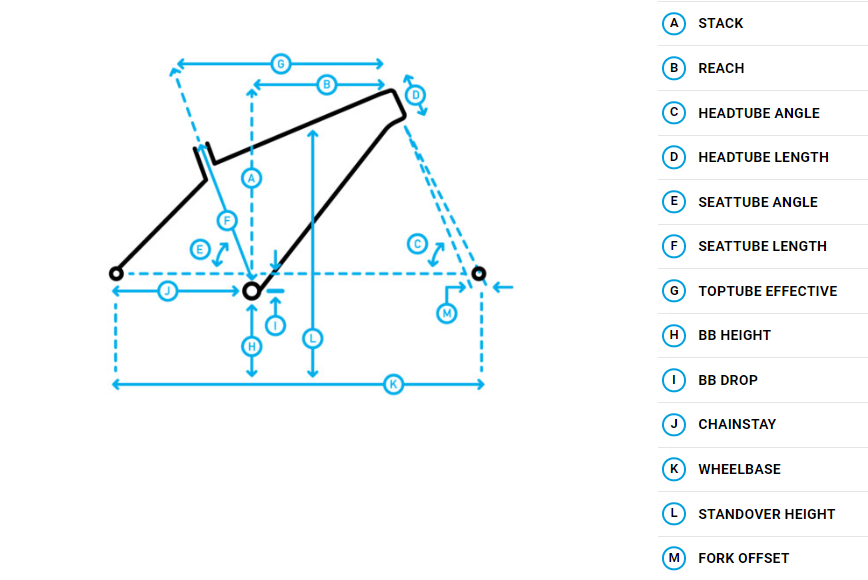

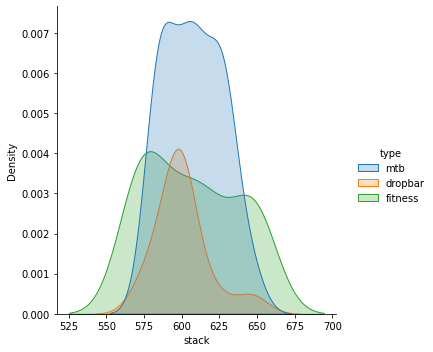

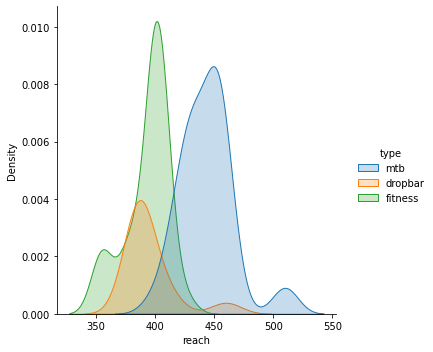

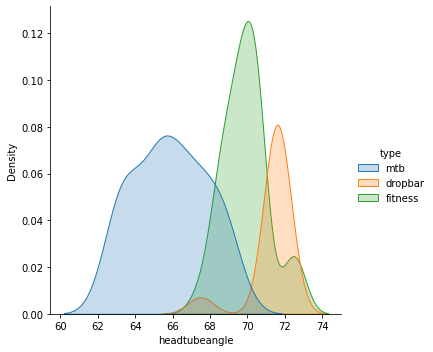

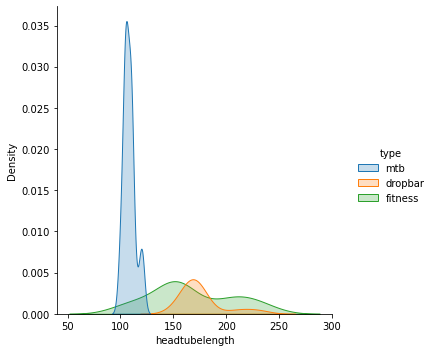

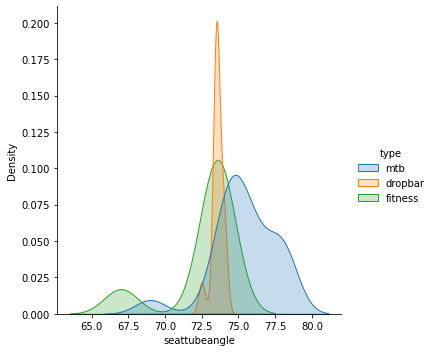

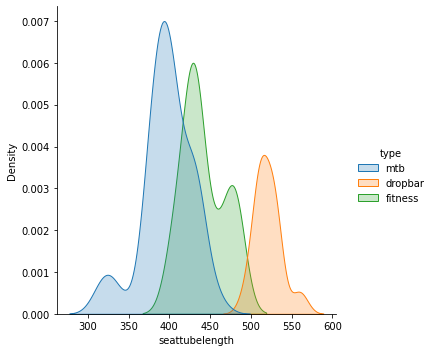

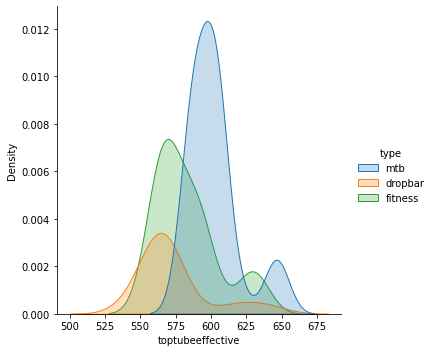

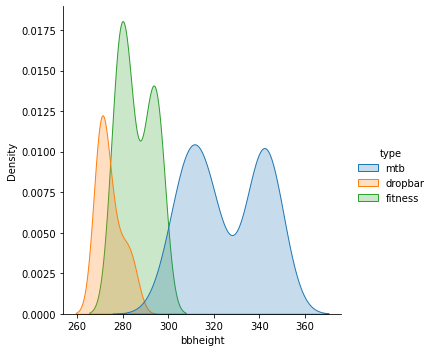

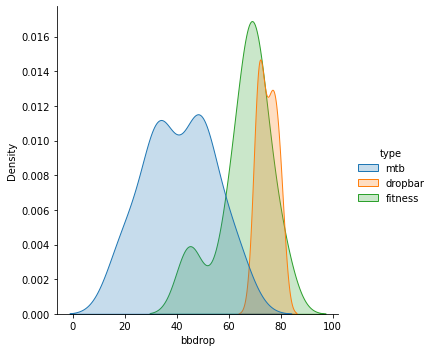

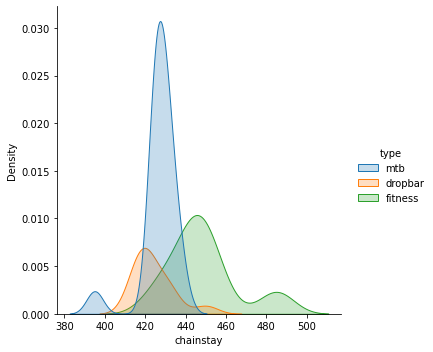

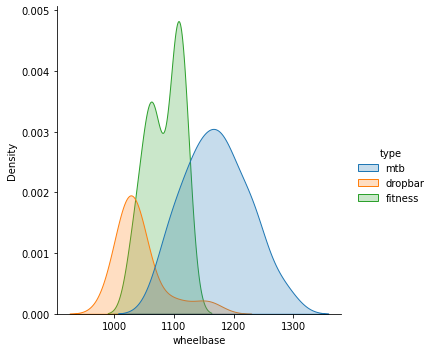

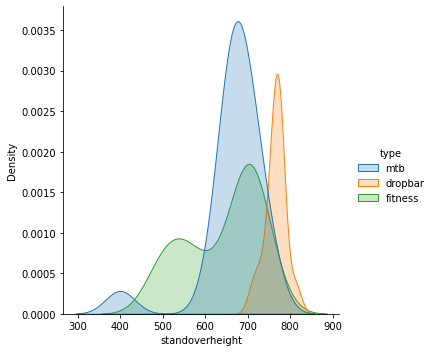

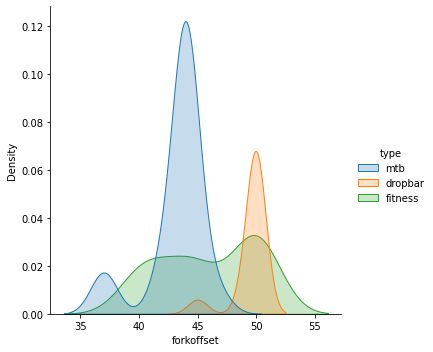

In [ ]:
import seaborn as sns
for variable in X:
  sns.displot(data = df_full,
              x = variable,
              hue = 'type',
              kind = 'kde',
              fill = True)

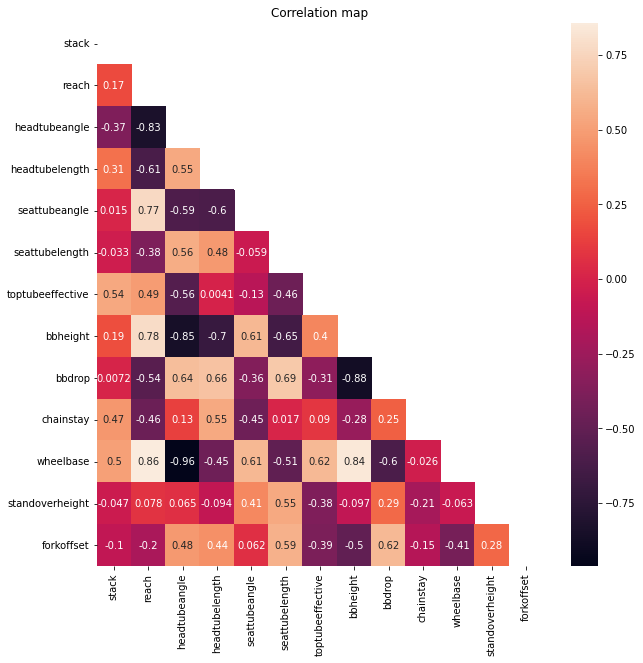

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
corr = df_full.corr(method = 'pearson')
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize = (10,10))
ax = sns.heatmap(corr, mask = mask, annot = True).set(title = 'Correlation map')


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tupl

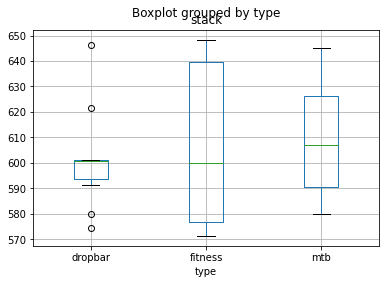

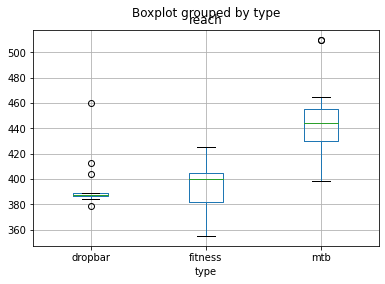

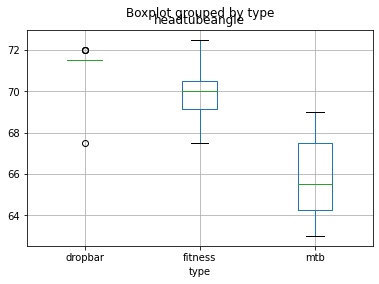

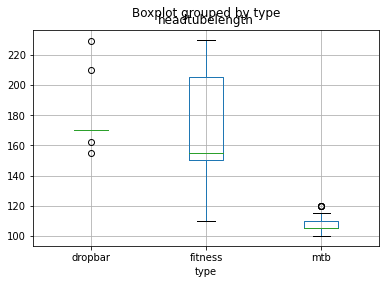

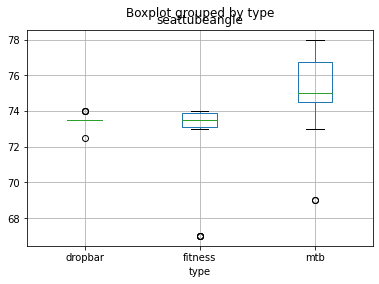

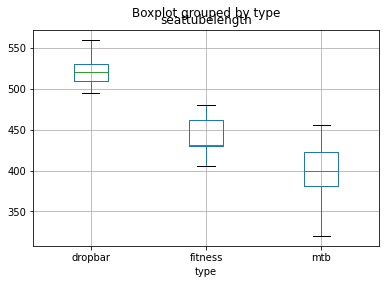

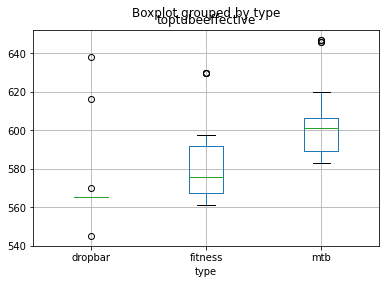

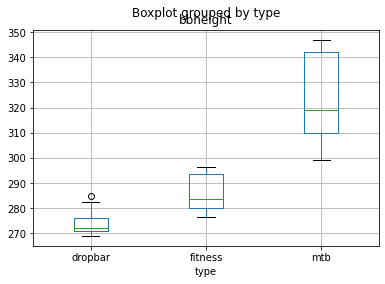

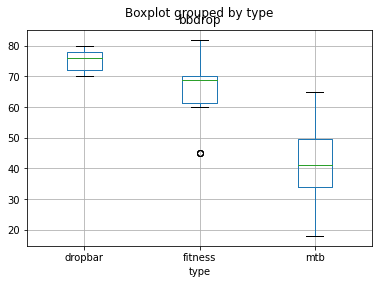

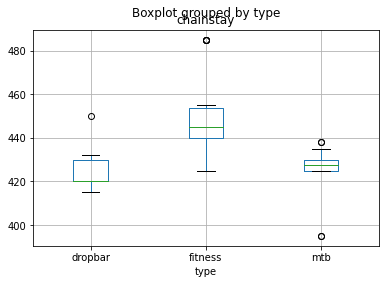

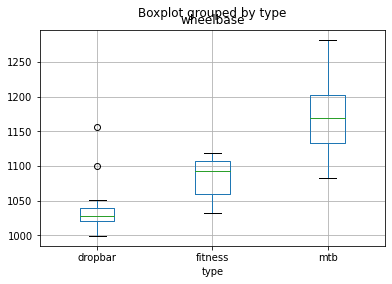

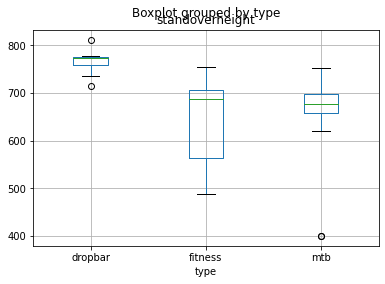

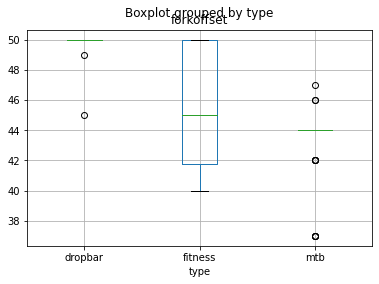

In [ ]:
for col in X.columns:
    df_full.boxplot(column = col, by = 'type')

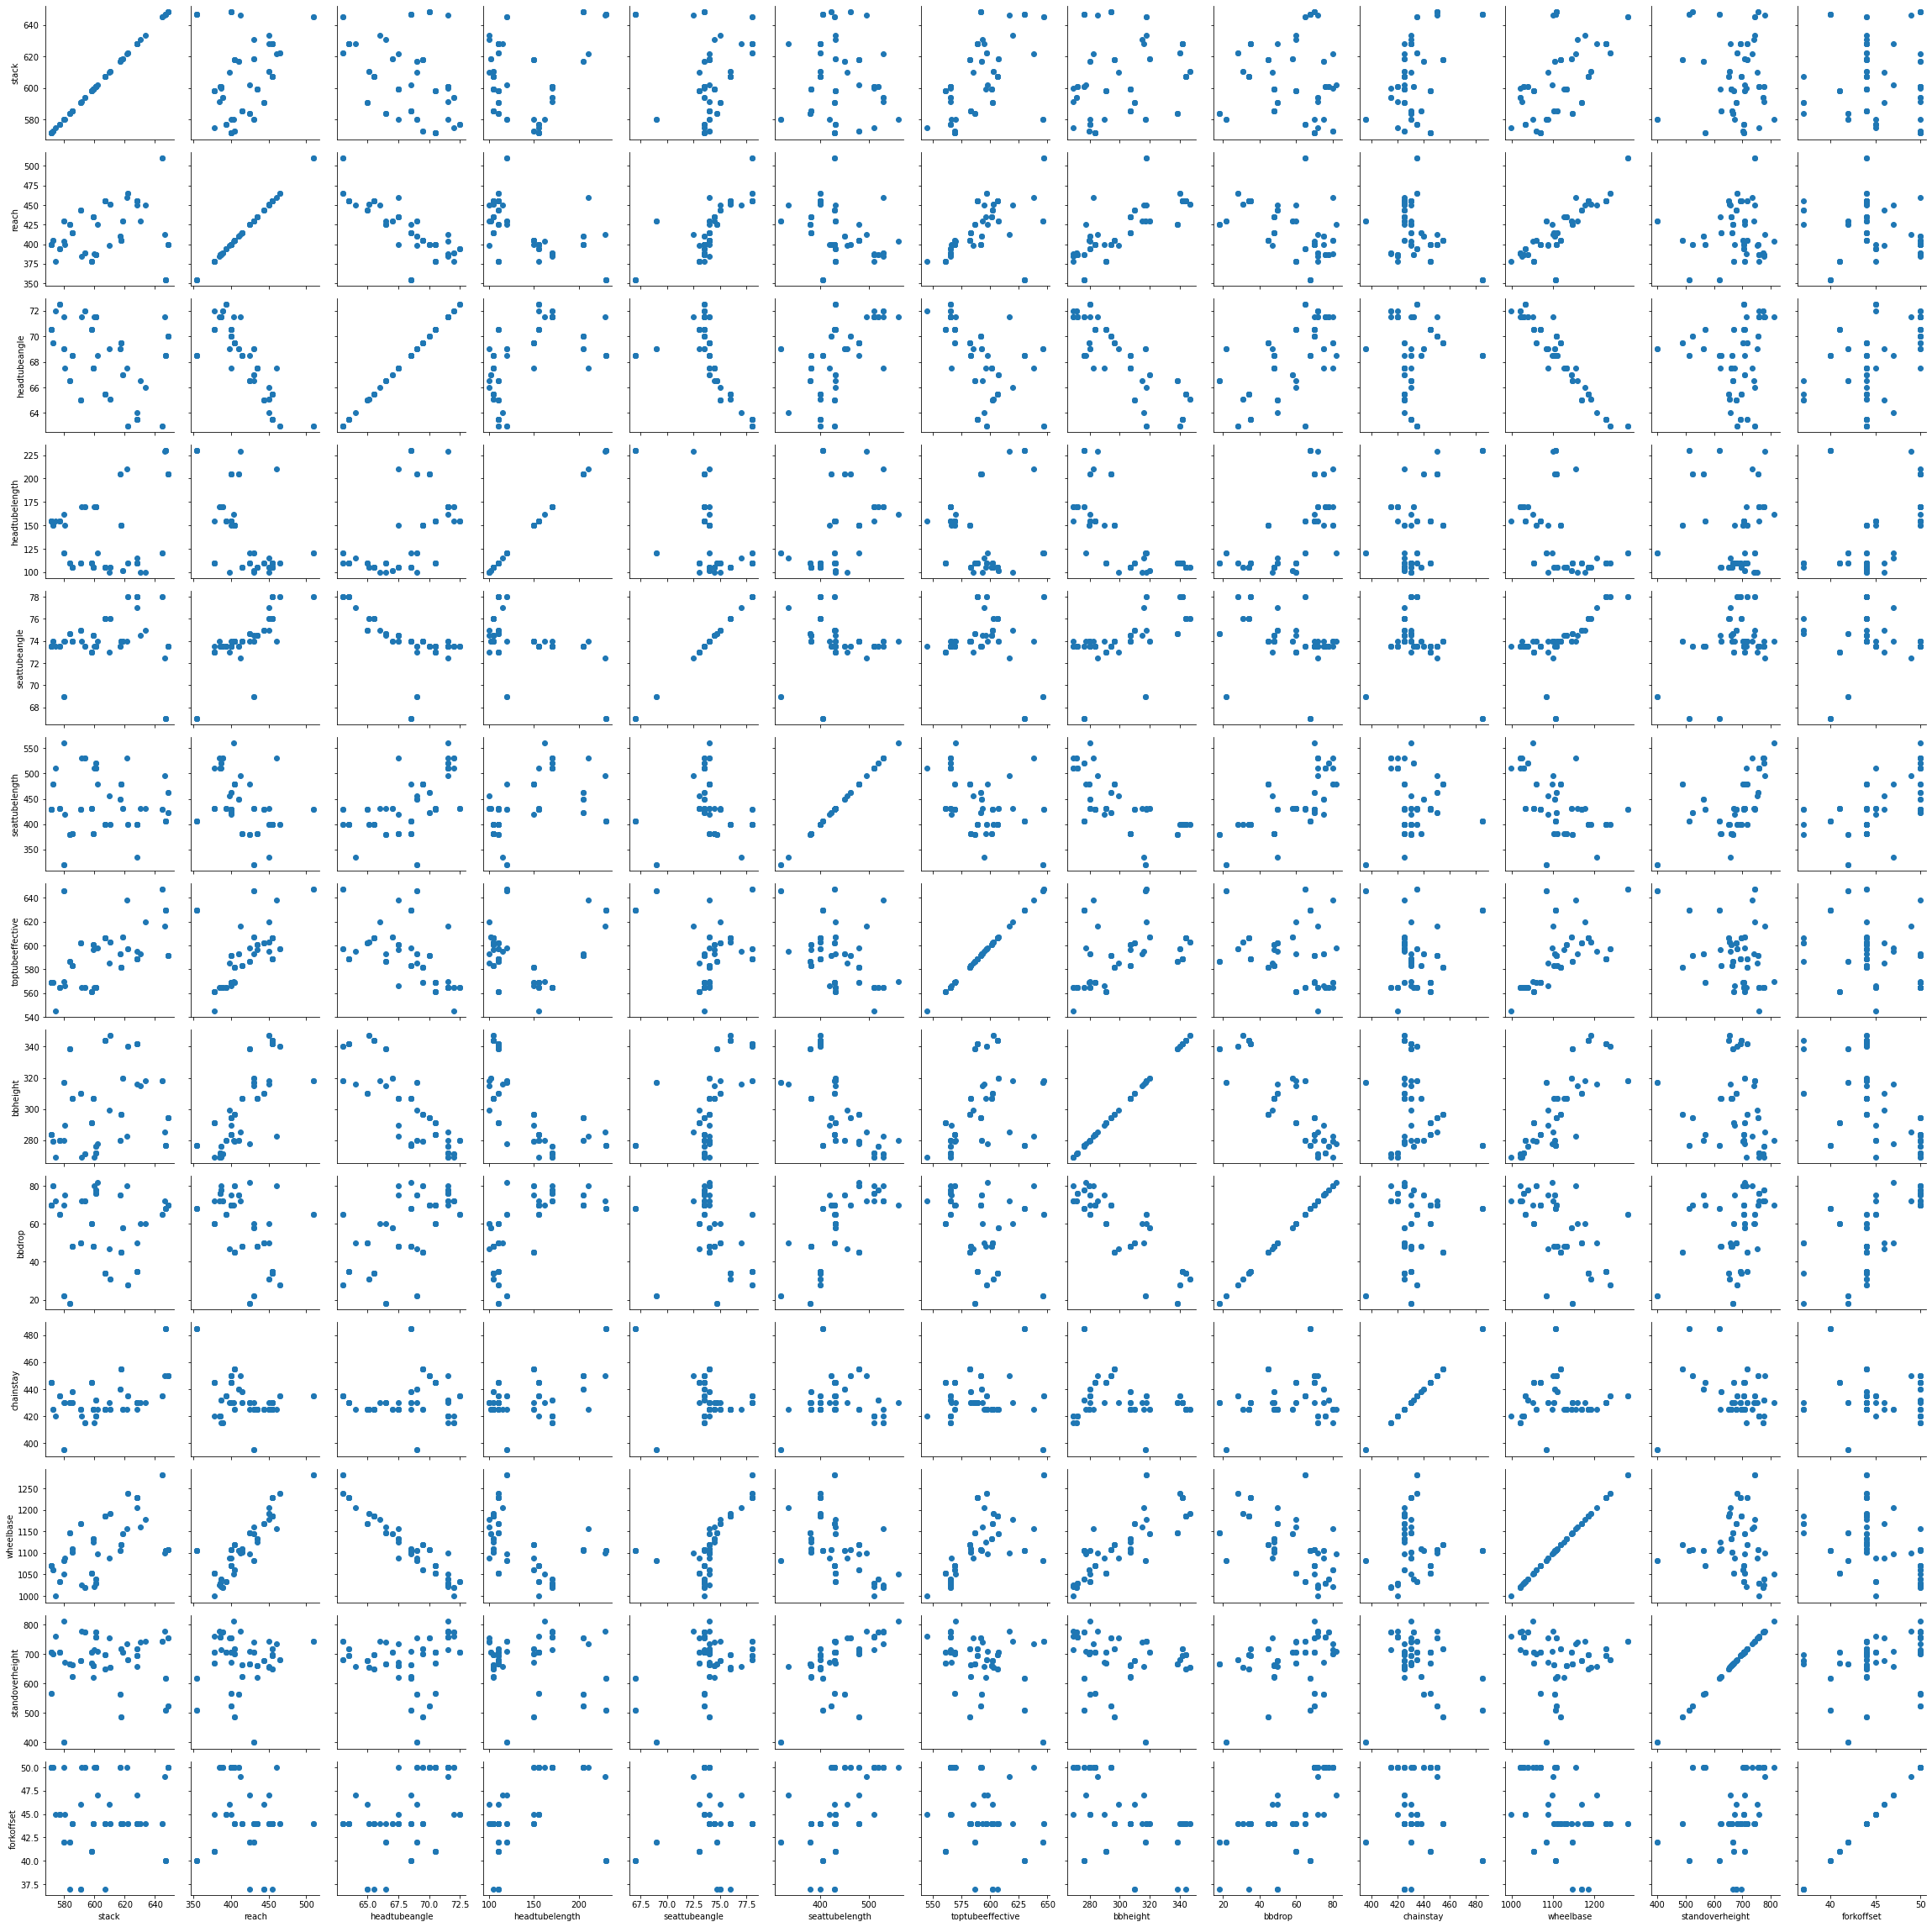

In [ ]:
g = sns.PairGrid(df_full)
g.map(plt.scatter)

# Budowa modelu

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
print(f'liczba obserwacji dla zbioru treningowego: {X_train.shape[0]}')
print(f'liczba obserwacji dla zbioru testowego:    {X_test.shape[0]}')

liczba obserwacji dla zbioru treningowego: 64
liczba obserwacji dla zbioru testowego:    17


In [ ]:
y_train.value_counts()

mtb        33
fitness    22
dropbar     9
Name: type, dtype: int64

In [ ]:
y_test.value_counts()

fitness    8
mtb        5
dropbar    4
Name: type, dtype: int64

In [ ]:
print(f"Liczba zduplikwoanych rekordów: {df_full.duplicated().sum()}  :(")

Liczba zduplikwoanych rekordów: 35  :(


In [ ]:
df_full

,stack,reach,headtubeangle,headtubelength,seattubeangle,seattubelength,toptubeeffective,bbheight,bbdrop,chainstay,wheelbase,standoverheight,forkoffset,type
0,628.00,455.00,63.5,110.0,78.0,400.0,589.00,342.0,35.0,430.0,1229.00,694.00,44.0,mtb
1,628.00,455.00,63.5,110.0,78.0,400.0,589.00,342.0,35.0,430.0,1229.00,694.00,44.0,mtb
2,628.00,455.00,63.5,110.0,78.0,400.0,589.00,342.0,35.0,430.0,1229.00,694.00,44.0,mtb
3,628.00,455.00,63.5,110.0,78.0,400.0,589.00,342.0,35.0,430.0,1229.00,716.00,44.0,mtb
4,610.32,450.74,65.1,105.0,76.0,400.0,602.91,347.0,31.0,425.0,1191.97,655.00,44.0,mtb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,646.90,355.00,68.5,230.0,67.0,406.0,629.60,276.5,68.0,485.0,1106.20,510.57,40.0,fitness
85,617.70,405.00,69.5,150.0,74.0,480.0,582.00,296.5,45.0,455.0,1118.90,717.79,44.0,fitness
86,617.70,405.00,69.5,150.0,74.0,480.0,582.00,296.5,45.0,455.0,1118.90,487.35,44.0,fitness
87,617.70,405.00,69.5,150.0,74.0,480.0,582.00,296.5,45.0,455.0,1118.90,717.79,44.0,fitness


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB


In [ ]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(kernel="poly", degree=3, C=0.025),
    SVC(kernel="rbf", C=1, gamma=2),
    GradientBoostingClassifier(n_estimators=100, learning_rate=1.0),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=100),
    AdaBoostClassifier(n_estimators=100),
    GaussianNB()]

names = ["Nearest_Neighbors", "Linear_SVM", "Polynomial_SVM", "RBF_SVM",
         "Gradient_Boosting", "Decision_Tree",  "Random_Forest", "AdaBoost",
         "Naive_Bayes"]

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
scores_test = []
scores_train = []
precision_scores = []
recall_scores = []
for name, clf in zip(names, classifiers):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    clf.fit(X_train, y_train)
    score_test = clf.score(X_test, y_test)
    scores_test.append(score_test)
    score_train = clf.score(X_train, y_train)
    scores_train.append(score_train)
    precision_scores.append(precision_score(y_test,clf.predict(X_test), average = 'weighted'))
    recall_scores.append(recall_score(y_test,clf.predict(X_test), average = 'weighted'))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Porównanie modeli i wybór najlepszego

In [ ]:
df_scores = pd.DataFrame()
df_scores['name'] = names
df_scores['score_test'] = scores_test
df_scores['score_train'] = scores_train
df_scores['precision_score_test'] = precision_scores
df_scores['recall_score_test'] = recall_scores
df_scores

,name,score_test,score_train,precision_score_test,recall_score_test
0,Nearest_Neighbors,0.941176,0.968750,0.946524,0.941176
1,Linear_SVM,0.882353,1.000000,0.921569,0.882353
2,Polynomial_SVM,0.647059,0.421875,0.418685,0.647059
3,RBF_SVM,0.764706,1.000000,0.843137,0.764706
4,Gradient_Boosting,0.823529,1.000000,0.837255,0.823529
5,Decision_Tree,0.882353,1.000000,0.929412,0.882353
6,Random_Forest,0.941176,1.000000,0.947712,0.941176
7,AdaBoost,1.000000,1.000000,1.000000,1.000000
8,Naive_Bayes,0.941176,0.937500,0.949580,0.941176


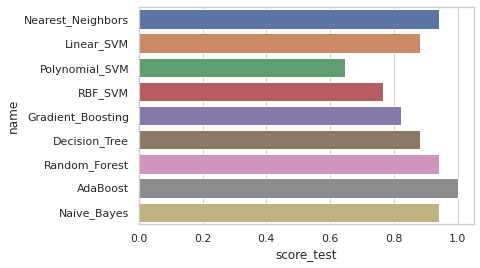

In [ ]:
sns.set(style="whitegrid")
ax = sns.barplot(y="name", x="score_test", data=df_scores)

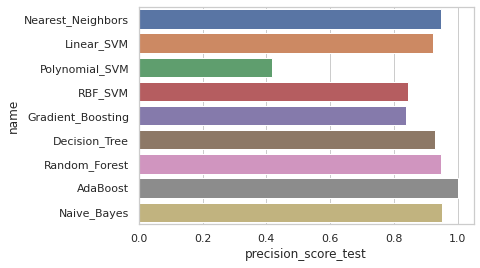

In [ ]:
sns.set(style="whitegrid")
ax = sns.barplot(y="name", x="precision_score_test", data=df_scores)

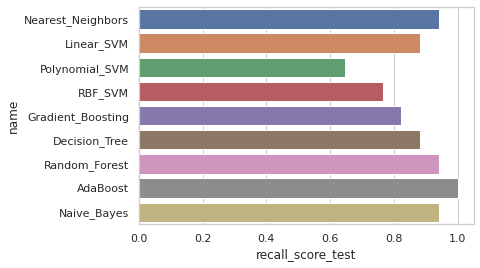

In [ ]:
sns.set(style="whitegrid")
ax = sns.barplot(y="name", x="recall_score_test", data=df_scores)

# Krosswalidacja modelu + analiza jakości

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
svc = SVC(kernel="linear")
params = {'kernel' : ['linear'],
          'degree':[1, 2, 3, 4, 5],
          'coef0': [0, 0.1, 0.001]}
grid_search = GridSearchCV(svc, param_grid = params, cv = 5)

grid_search.fit(X_train, y_train)
grid_search.best_estimator_

SVC(coef0=0, degree=1, kernel='linear')

In [ ]:
grid_search.best_score_

0.9692307692307693

In [ ]:
y_pred = grid_search.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

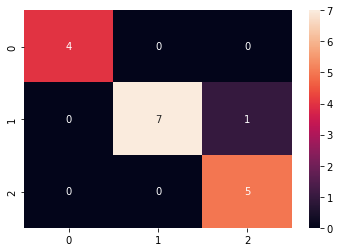

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     dropbar       1.00      1.00      1.00         4
     fitness       1.00      0.88      0.93         8
         mtb       0.83      1.00      0.91         5

    accuracy                           0.94        17
   macro avg       0.94      0.96      0.95        17
weighted avg       0.95      0.94      0.94        17

